# 📂 Titanic Dataset Project: Exploratory Data Analysis & ML Models

## 🧑‍💻 **Project Overview**

This project explores the **Titanic dataset** to uncover patterns in **passenger survival**, leveraging:
- 🔍 Exploratory Data Analysis (EDA)
- 🛠️ Feature Engineering
- 🧪 Machine Learning models (Decision Tree & KNN)
- 🎯 Accuracy Evaluation and Comparison

**Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

**Load Dataset**

In [2]:
df = pd.read_csv("D:/45 Days Data Science/Datasets/titanic-1.csv")

**Initial Data Exploration**

In [3]:
print("Info :",df.info())
print("Describe :",df.describe())
print("\nFirst Five Entries:")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
Info : None
Describe :          Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.

## 🧹 **Data Cleaning & Preprocessing**

**Check for missing data**

In [4]:
print("\nMissing Data:")
print(df.isnull().sum())


Missing Data:
Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64


**Removes Duplicates**

In [5]:
print("Duplicates before :", df.duplicated().sum())
print("Data size before :", df.shape)
df.drop_duplicates(inplace=True)
print("Data size after :", df.shape)
print("Duplicates after :", df.duplicated().sum())

Duplicates before : 0
Data size before : (887, 8)
Data size after : (887, 8)
Duplicates after : 0


**Rename Columns**

In [6]:
df.rename(columns={'Siblings/Spouses Aboard': 'FamMem','Parents/Children Aboard': 'FamDep'}, inplace=True)

**Create new columns**

In [7]:
df['FamTot'] = df['FamMem'] + df['FamDep'] + 1
df['Solo'] = 1
df.loc[df['FamTot'] > 1, 'Solo'] = 0
df['AgeGrp'] = pd.cut(df['Age'], bins=[0, 15, 25, 45, 65, 80], labels=['Child', 'Youth', 'Adult', 'Senior', 'Elder'])
df['FareGrp'] = pd.cut(df['Fare'], bins=[0, 15, 40, 80, 600], labels=['Low', 'Med', 'High', 'Ultra'])

## 📊 **Exploratory Data Analysis (EDA)**

### 1️⃣ Pie Chart: Gender Distribution
🟦 **Male passengers** outnumbered females  
🟣 Impacts rescue outcomes (priority given to women & children)

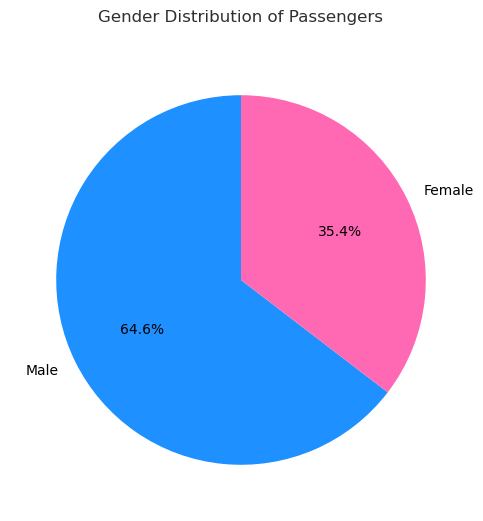

In [8]:
plt.figure(figsize=(8, 6))
plt.pie(df['Sex'].value_counts(), labels=['Male', 'Female'], colors=['#1E90FF', '#FF69B4'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Passengers', color='#2F2F2F', pad=20)
plt.show()

### 2️⃣ Stacked Bar: Survival by Gender
👩‍🦰 Females had a much higher survival rate than males  
📌 Confirms historical "women and children first" protocol

<Figure size 800x600 with 0 Axes>

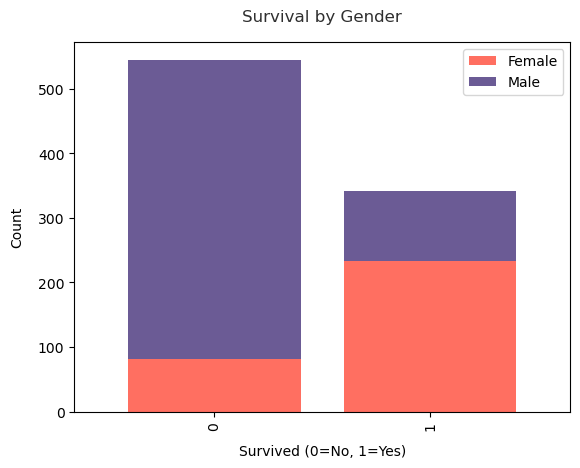

In [9]:
plt.figure(figsize=(8, 6))
sur = df.groupby(['Survived', 'Sex']).size().unstack(fill_value=0)
sur.plot(kind='bar', stacked=True, color=['#FF6F61', '#6B5B95'], width=0.8)
plt.title('Survival by Gender', color='#2F2F2F', pad=15)
plt.xlabel('Survived (0=No, 1=Yes)', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.legend(['Female', 'Male'], loc='upper right')
plt.show()

### 3️⃣ Line Chart: Age Group Survival
👶 Children had the highest survival rate  
👵 Elderly had the lowest

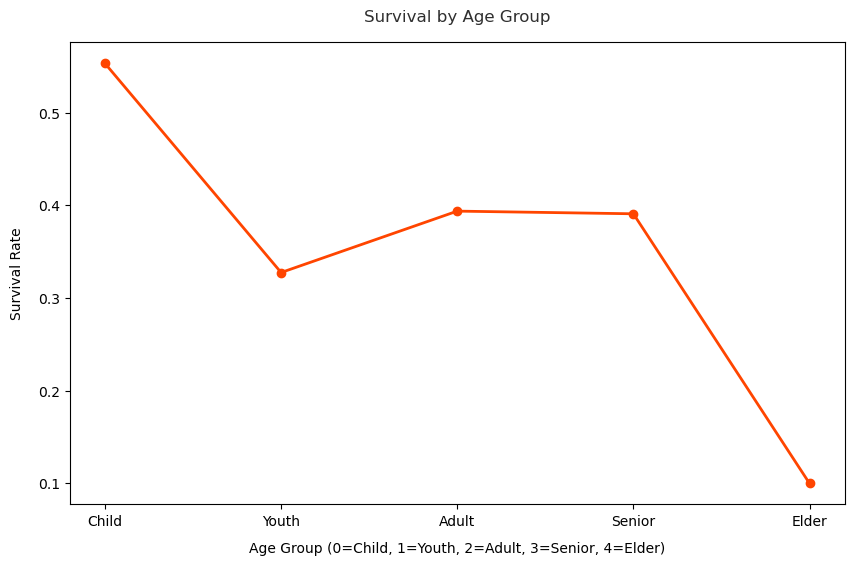

In [10]:
df['AgeNum'] = df['AgeGrp'].cat.codes
age_sur = df.groupby('AgeNum')['Survived'].mean().reindex([0, 1, 2, 3, 4], fill_value=0)
plt.figure(figsize=(10, 6))
plt.plot(age_sur.index, age_sur.values, marker='o', color='#FF4500', linewidth=2)
plt.title('Survival by Age Group', color='#2F2F2F', pad=15)
plt.xlabel('Age Group (0=Child, 1=Youth, 2=Adult, 3=Senior, 4=Elder)', labelpad=10)
plt.ylabel('Survival Rate', labelpad=10)
plt.xticks([0, 1, 2, 3, 4], ['Child', 'Youth', 'Adult', 'Senior', 'Elder'])
plt.show()

### 4️⃣ Hexbin Plot: Fare vs Class
💸 Dense fare clusters in **1st class**  
🏷️ Highlights ticket pricing concentration and luxury tier

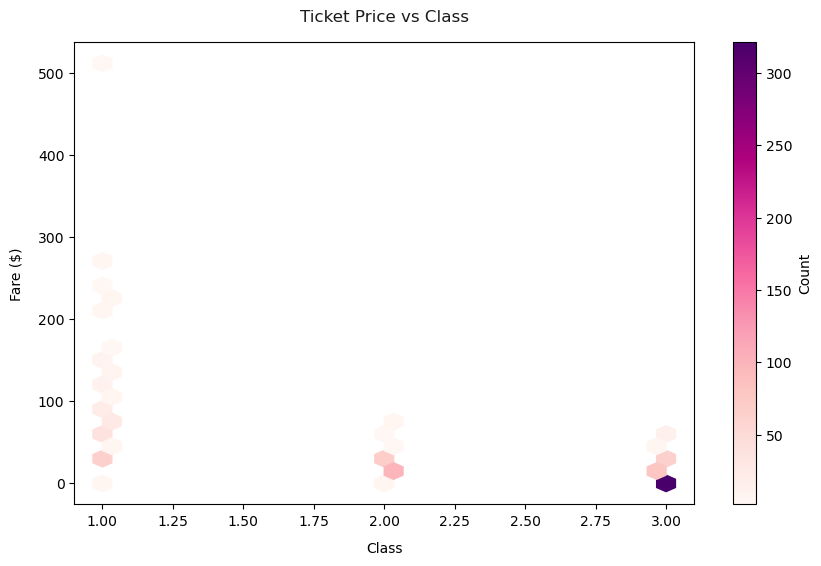

In [11]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['Pclass'], df['Fare'], gridsize=30, cmap='RdPu', mincnt=1)
plt.colorbar(label='Count')
plt.title('Ticket Price vs Class', color='#1A1A1A', pad=15)
plt.xlabel('Class', labelpad=10)
plt.ylabel('Fare ($)', labelpad=10)
plt.show()

### 5️⃣ Histogram: Age Distribution
👥 Peaks between 20–30 and 50–60  
📈 Mix of younger adults and mature passengers

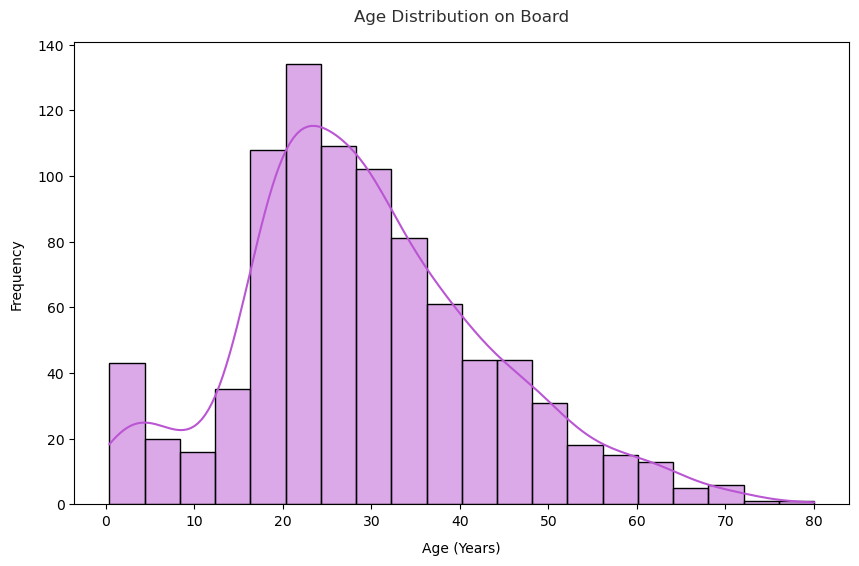

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, color='#BA55D3', kde=True)
plt.title('Age Distribution on Board', color='#2F2F2F', pad=15)
plt.xlabel('Age (Years)', labelpad=10)
plt.ylabel('Frequency', labelpad=10)
plt.show()

### 6️⃣ Point Plot: Survival by Fare and Class
🎫 Higher fare ≈ Higher survival, especially in 1st class  
🛟 Indicates class/rescue priority

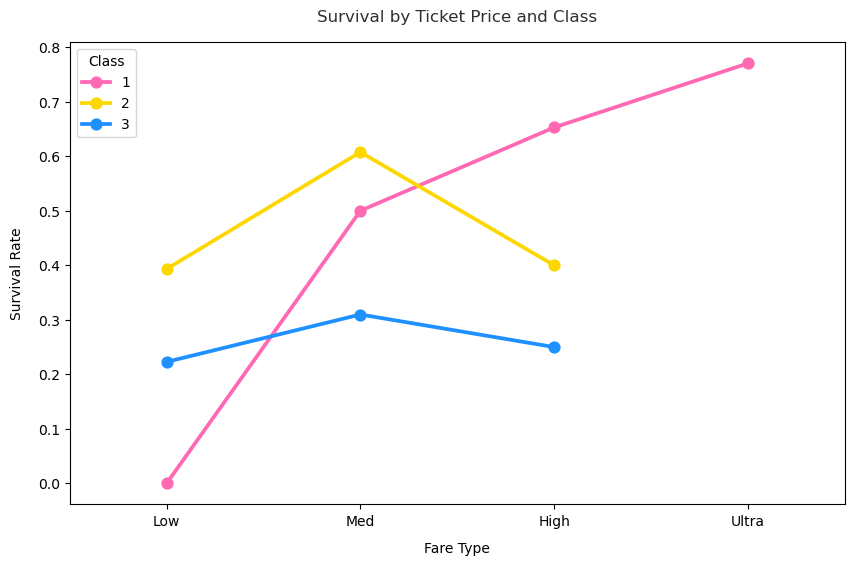

In [13]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='FareGrp', y='Survived', hue='Pclass', data=df, palette=['#FF69B4', '#FFD700', '#1E90FF'], errorbar=None)
plt.title('Survival by Ticket Price and Class', color='#2F2F2F', pad=15)
plt.xlabel('Fare Type', labelpad=10)
plt.ylabel('Survival Rate', labelpad=10)
plt.legend(title='Class', loc='upper left')
plt.show()

### 7️⃣ Violin Plot: Family Size Impact On Survival
👨‍👩‍👧‍👦 Mixed survival rates for larger families (>4)

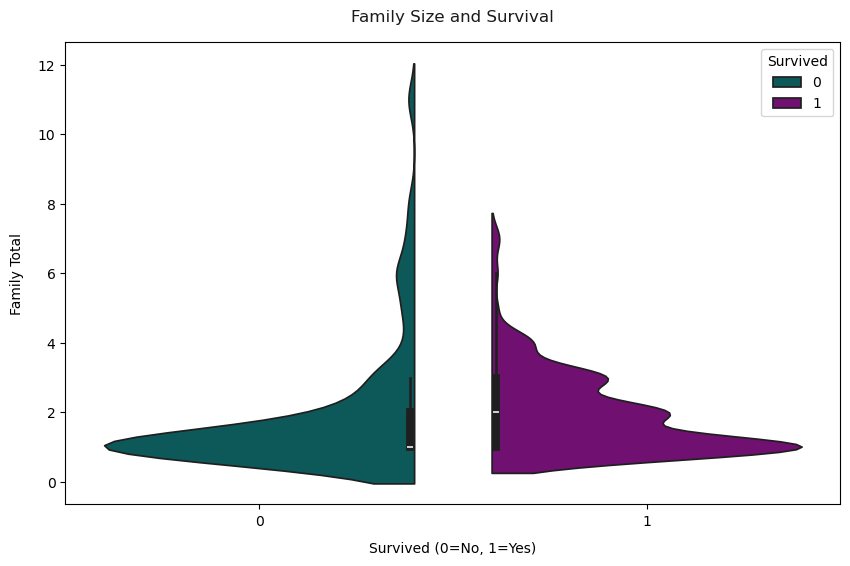

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='FamTot', hue='Survived', data=df, palette=['#006666', '#800080'], split=True)
plt.title('Family Size and Survival', color='#1A1A1A', pad=15)
plt.xlabel('Survived (0=No, 1=Yes)', labelpad=10)
plt.ylabel('Family Total', labelpad=10)
plt.legend(title='Survived', loc='upper right')
plt.show()

### 8️⃣ Heatmap: Correlation Matrix
🎯 Strong link between:
- `Pclass`, `Fare`, and `Survived`
- `Fare` and `Family members`

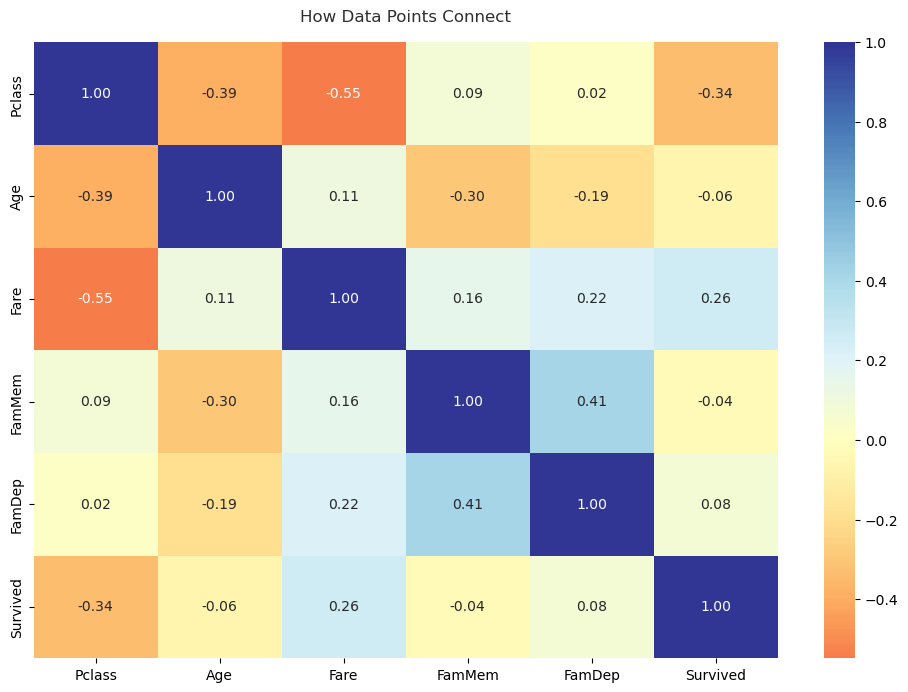

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Pclass', 'Age', 'Fare', 'FamMem', 'FamDep', 'Survived']].corr(), annot=True, cmap='RdYlBu', center=0, fmt='.2f', annot_kws={"size": 10})
plt.title('How Data Points Connect', color='#2F2F2F', pad=15)
plt.show()

### 9️⃣ Scatter Plot: Age vs Fare vs Survival
💡 High-paying large families showed lower survival 

📌 Possibly due to group size and rescue delay

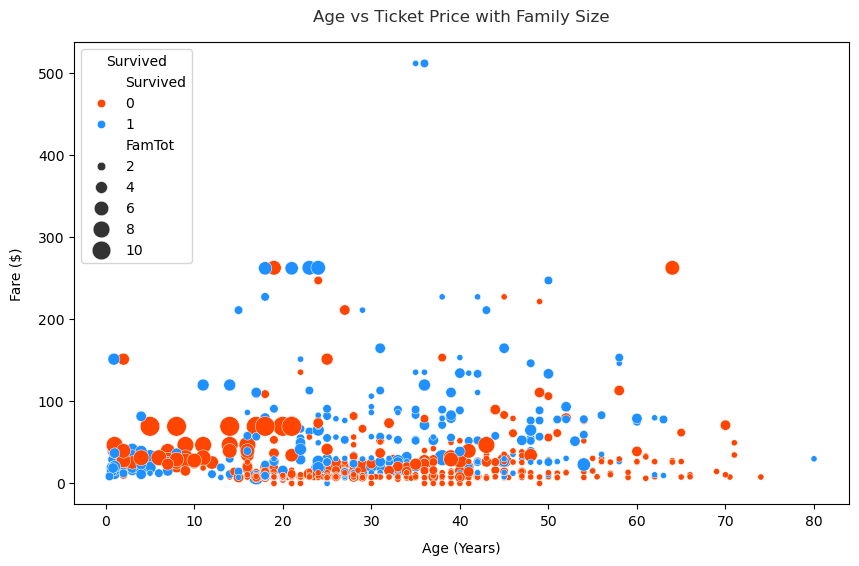

In [16]:
# Scatter plot: age vs ticket price with family size
# High fares with large families (>5) correlate with lower survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', size='FamTot', sizes=(20, 200), data=df, palette=['#FF4500', '#1E90FF'])
plt.title('Age vs Ticket Price with Family Size', color='#2F2F2F', pad=15)
plt.xlabel('Age (Years)', labelpad=10)
plt.ylabel('Fare ($)', labelpad=10)
plt.legend(title='Survived', loc='upper left')
plt.show()

### 🔟 Subplot Dashboard
🧠 Multiple insights in a single view:
- Age vs Class
- Solo travelers and fare
- Gender spread
- Fare by survival

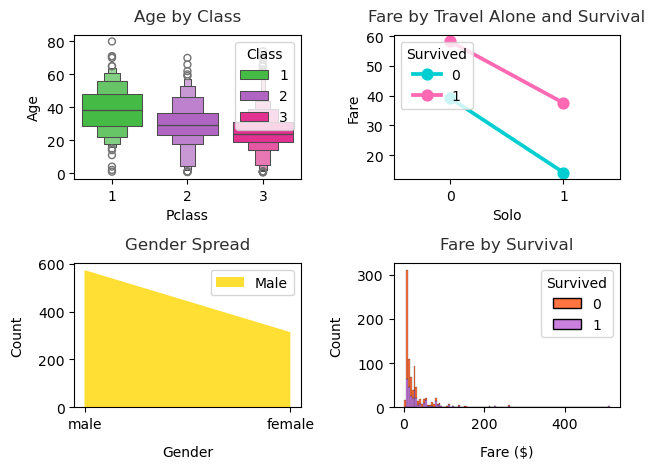

In [17]:
# 1st class has a wider age range, suggesting a mix of families and older passengers, while 3rd class leans younger
plt.subplot(2, 2, 1)
sns.boxenplot(x='Pclass', y='Age', hue='Pclass', data=df, palette=['#32CD32', '#BA55D3', '#FF1493'])
plt.title('Age by Class', color='#2F2F2F', pad=10)
plt.legend(title='Class', loc='upper right')
# Solo travelers paying higher fares show better survival, indicating priority rescue
plt.subplot(2, 2, 2)
sns.pointplot(x='Solo', y='Fare', hue='Survived', data=df, palette=['#00CED1', '#FF69B4'], errorbar=None)
plt.title('Fare by Travel Alone and Survival', color='#2F2F2F', pad=10)
plt.legend(title='Survived', loc='upper left')
# The higher male count (around 65%) likely influenced the "women and children first" rescue 
plt.subplot(2, 2, 3)
plt.stackplot(df['Sex'].value_counts().index, df['Sex'].value_counts().values, labels=['Male', 'Female'], colors=['#FFD700', '#1E90FF'], alpha=0.8)
plt.title('Gender Spread', color='#2F2F2F', pad=10)
plt.xlabel('Gender', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.legend(loc='upper right')
# Higher fares (above $50) show a survival peak, suggesting wealthier passengers had better rescue chances
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='Fare', hue='Survived', palette=['#FF4500', '#BA55D3'], multiple='stack')
plt.title('Fare by Survival', color='#2F2F2F', pad=10)
plt.xlabel('Fare ($)', labelpad=10)
plt.ylabel('Count', labelpad=10)
plt.tight_layout()
plt.show()

### 1️⃣1️⃣ Pairplot
📊 Shows relationship between continuous variables  
✅ Survivors centered around mid-aged, mid-fare passengers avoiding extremes.

<Figure size 1200x800 with 0 Axes>

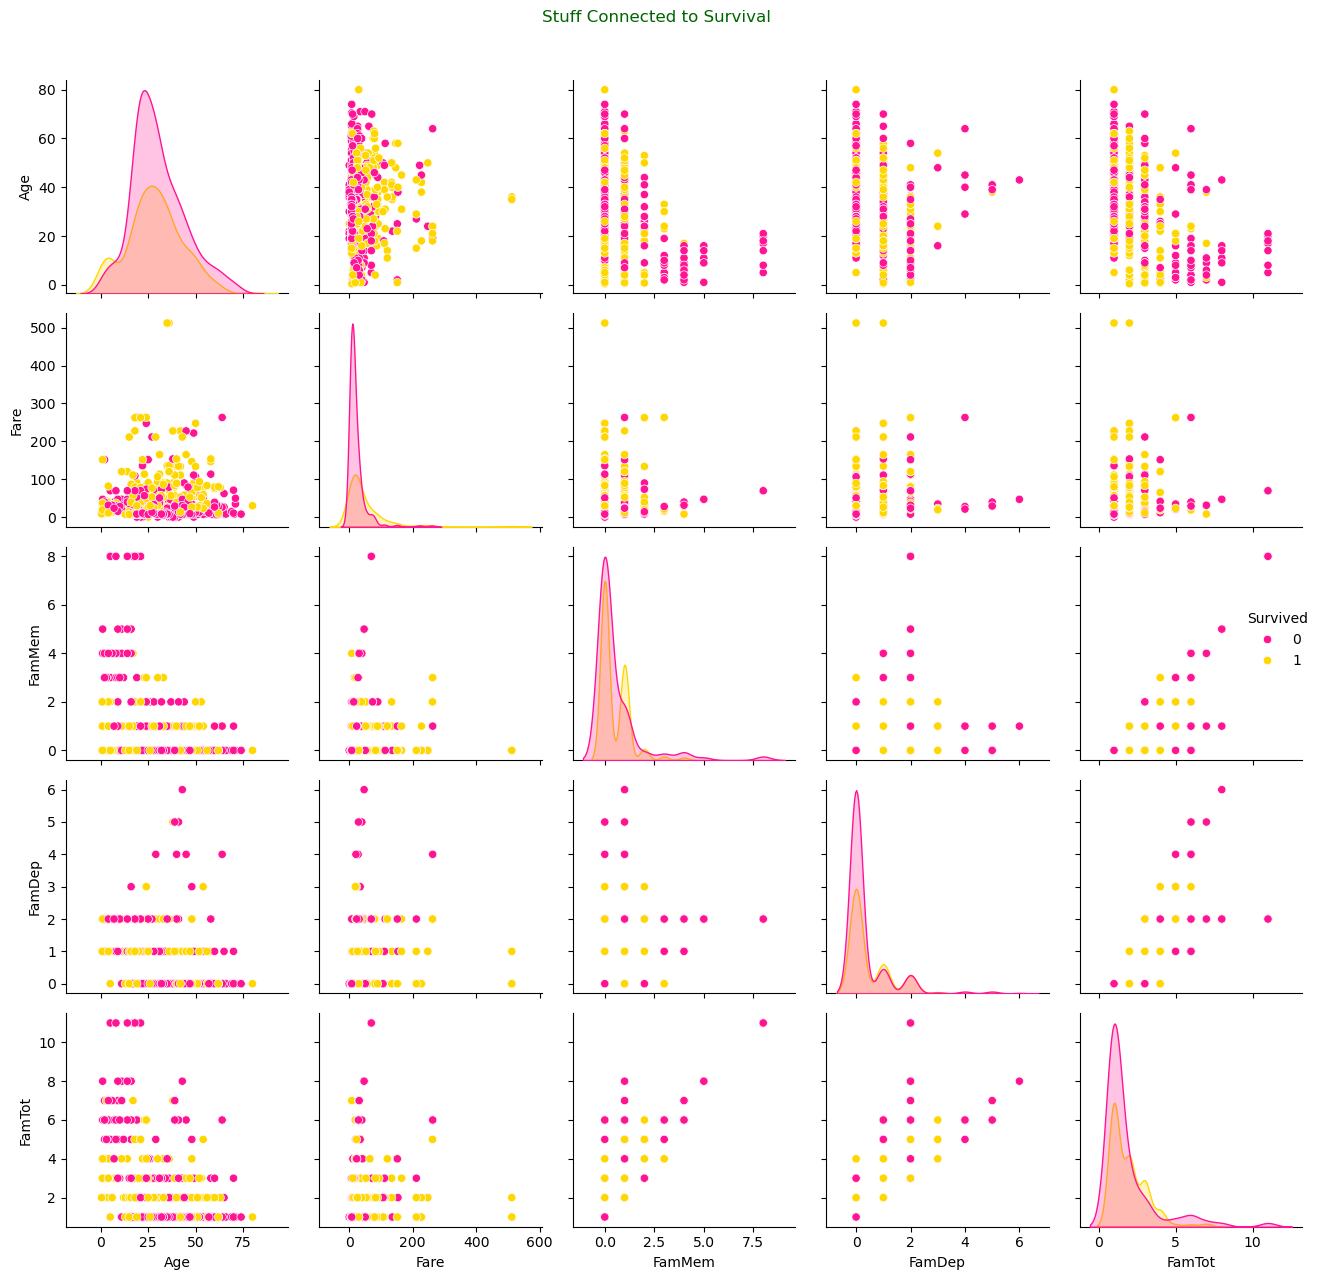

In [18]:
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=['Age', 'Fare', 'FamMem', 'FamDep', 'FamTot'], hue='Survived', palette=['#FF1493', '#FFD700'])
plt.suptitle('Stuff Connected to Survival', color='#006400', y=1.02)
plt.tight_layout()
plt.show()

## 🚨 Outlier Detection & Removal

- Used **IQR (Interquartile Range)** method
- Removed extreme values in `Fare` and `Age`
- Visualized before and after using **boxplots**

**Highlights extreme fares and young ages.**

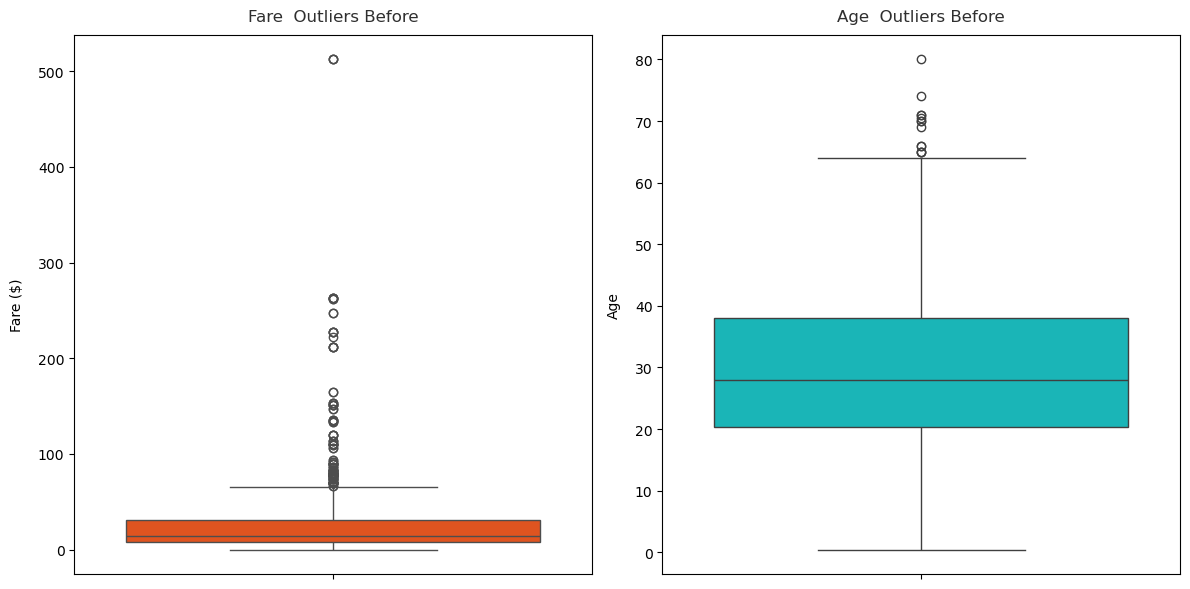

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Fare', data=df, color='#FF4500')
plt.title('Fare  Outliers Before', color='#2F2F2F', pad=10)
plt.ylabel('Fare ($)', labelpad=10)
plt.subplot(1, 2, 2)
sns.boxplot(y='Age', data=df, color='#00CED1')
plt.title('Age  Outliers Before', color='#2F2F2F', pad=10)
plt.ylabel('Age', labelpad=10)
plt.tight_layout()
plt.show()

**Removes outliers using IQR**

In [20]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
up = q3 + 1.5 * iqr
clean_data = df[(df['Fare'] >= low) & (df['Fare'] <= up)]

q1_age = clean_data['Age'].quantile(0.25)
q3_age = clean_data['Age'].quantile(0.75)
iqr_age = q3_age - q1_age
low_age = q1_age - 1.5 * iqr_age
up_age = q3_age + 1.5 * iqr_age
clean_data = clean_data[(clean_data['Age'] >= low_age) & (clean_data['Age'] <= up_age)]

**Displays cleaned data with boxplots**

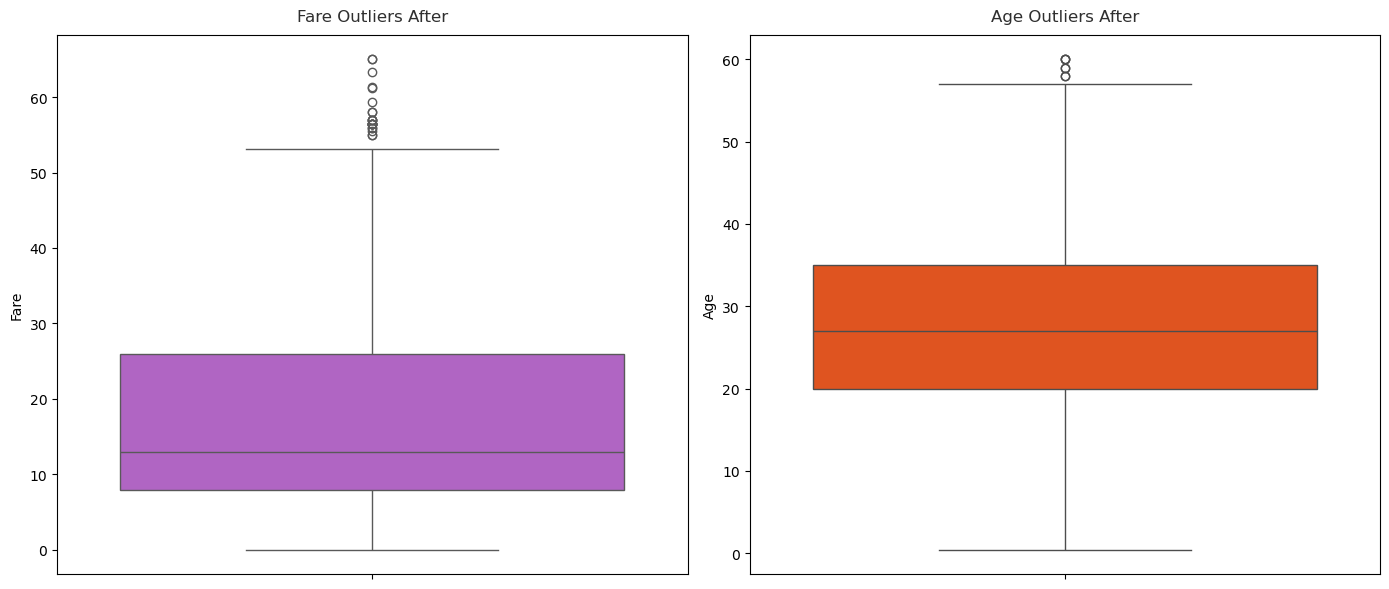

In [21]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Fare', data=clean_data, color='#BA55D3')
plt.title('Fare Outliers After', color='#2F2F2F', pad=10)
plt.subplot(1, 2, 2)
sns.boxplot(y='Age', data=clean_data, color='#FF4500')
plt.title('Age Outliers After', color='#2F2F2F', pad=10)
plt.tight_layout()
plt.show()

## 🧠 Machine Learning Models

### 🔡 Feature Encoding & Scaling
- Encoded categorical features: `Sex`, `AgeGrp`, `FareGrp`
- Scaled numerical features using `StandardScaler`

### 📌 Features Used:
- `Pclass`, `Age`, `Fare`, `FamTot`, `Solo`, `SexNum`, `AgeNum`, `FareNum`

In [22]:
# Prepares data and uses models to predict survival.
# Outcome: Tests decision tree and KNN for best accuracy.

# Encode labels: Converts Sex, AgeGrp, and FareGrp to numbers.
le = LabelEncoder()
clean_data['SexNum'] = le.fit_transform(clean_data['Sex'])
clean_data['AgeNum'] = le.fit_transform(clean_data['AgeGrp'].astype(str))
clean_data['FareNum'] = le.fit_transform(clean_data['FareGrp'].astype(str))

# Prepare data
feat_data = clean_data[['Pclass', 'Age', 'Fare', 'FamMem', 'FamDep', 'FamTot', 'Solo', 'SexNum', 'AgeNum', 'FareNum']]
target_data = clean_data['Survived']

# Scale the features
scaler = StandardScaler()
feat_scaled = scaler.fit_transform(feat_data)
train_feat, test_feat, train_target, test_target = train_test_split(feat_scaled, target_data, test_size=0.2, random_state=42)


## 🌳 Model 1: Decision Tree Classifier

- **Max Depth**: 5  
- **Accuracy**: `80.0%`  
- **Visualization**: Shows feature-based survival decisions

📌 *Decision Trees are easy to interpret and visualize.*

In [23]:
tree_mod = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_mod.fit(train_feat, train_target)
tree_pred = tree_mod.predict(test_feat)
tree_acc = accuracy_score(test_target, tree_pred)

print("Tree Model Score:", tree_acc)

Tree Model Score: 0.8


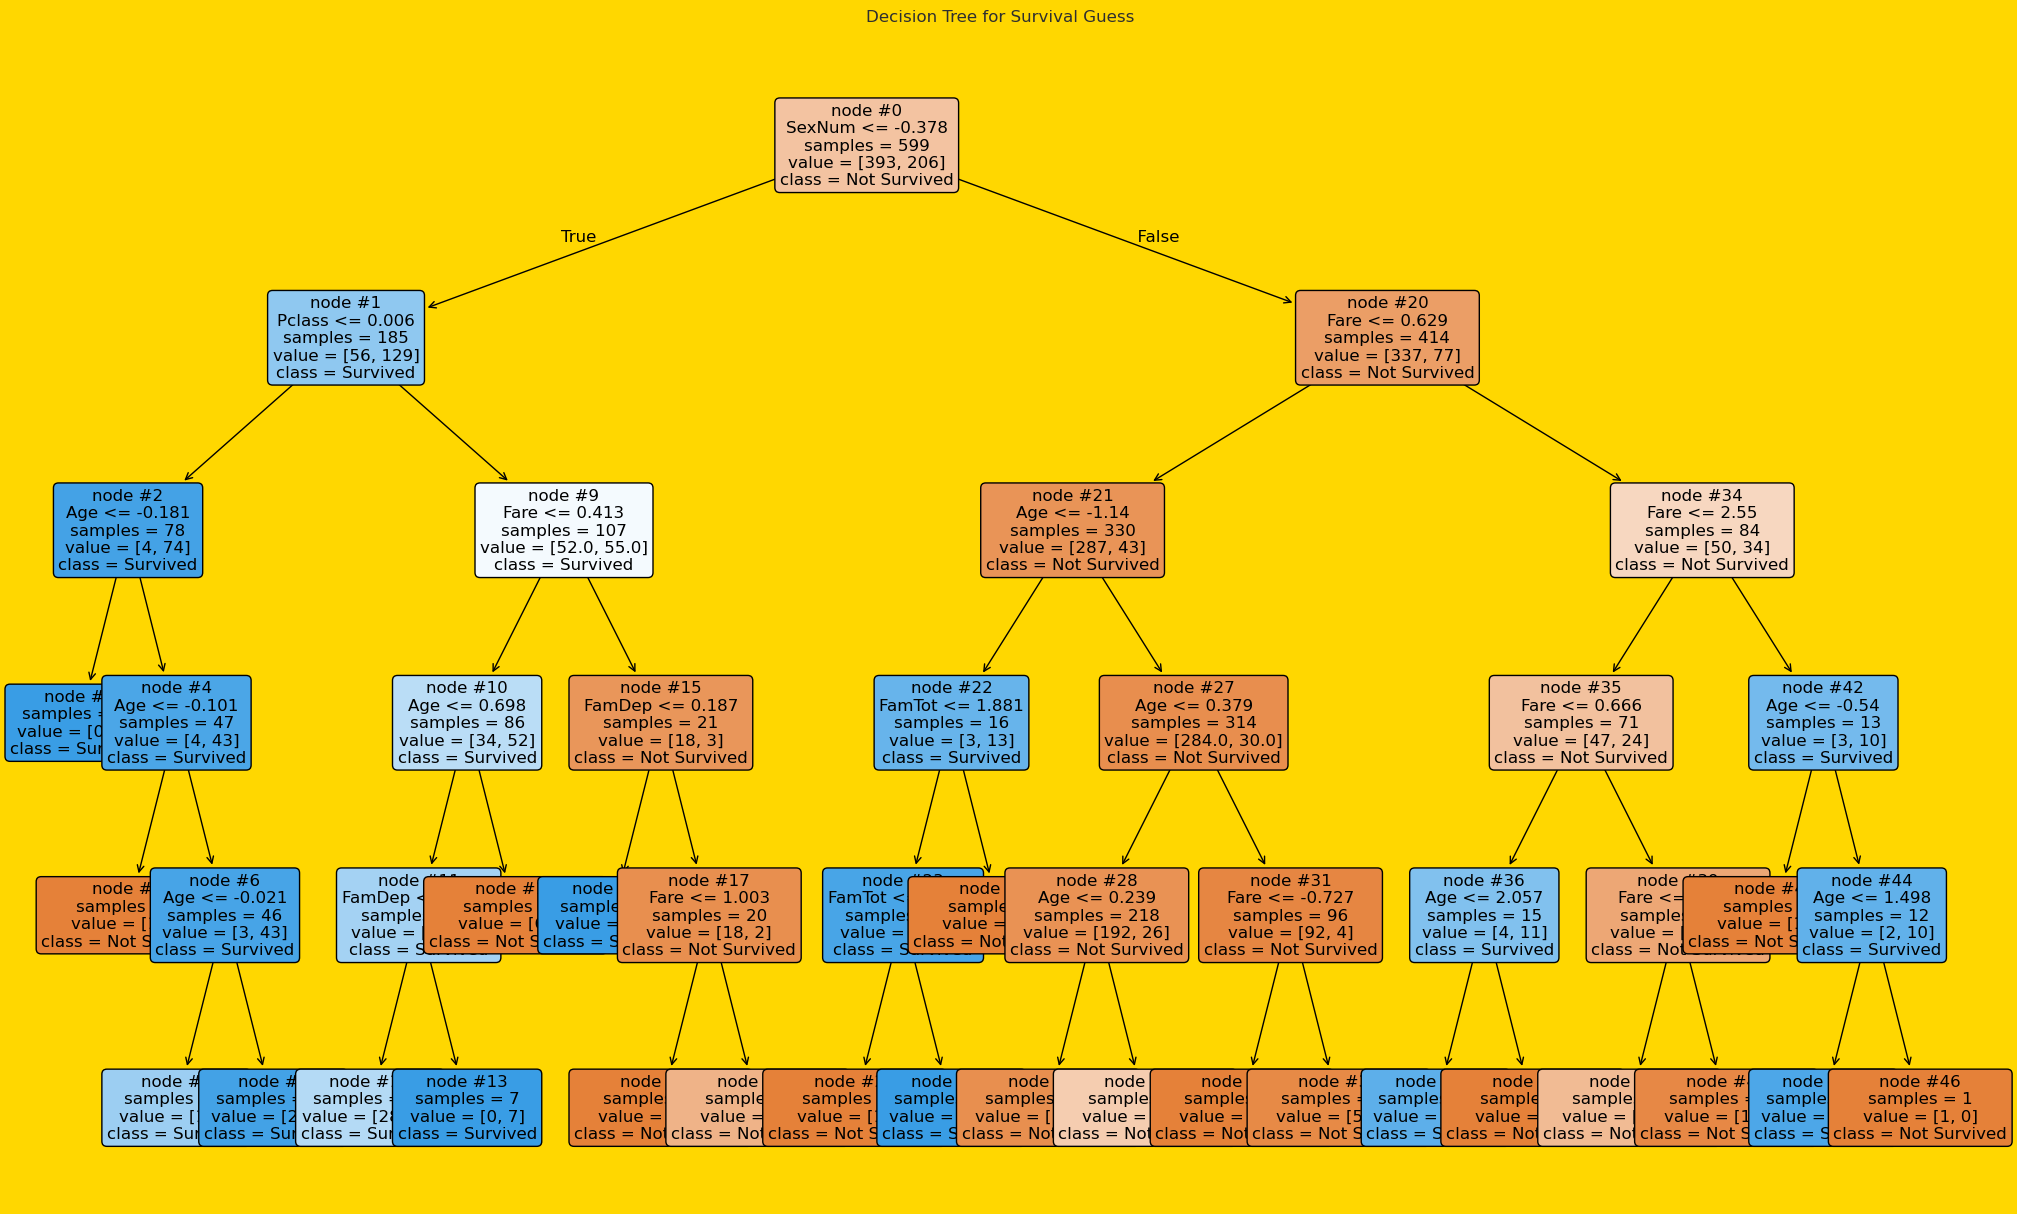

In [24]:
# Shows how the tree decides survival.
plt.figure(figsize=(25, 15))
plot_tree(tree_mod, feature_names=feat_data.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True, node_ids=True, impurity=False, fontsize=12)
plt.title('Decision Tree for Survival Guess', color='#2F2F2F', pad=20)
plt.gcf().set_facecolor('#FFD700')
for patch in plt.gca().get_children():
    if isinstance(patch, plt.Polygon):
        patch.set_facecolor('#FF4500' if patch.get_facecolor()[0] > 0.5 else '#00CED1')
        patch.set_edgecolor('#FF69B4')
plt.show()

## 🤖 Model 2: K-Nearest Neighbors (KNN)

- Tested **k = 1 to 20**
- **Best Accuracy**: `82.67%` at **k = 16**
- KNN captured non-linear patterns better than the tree

📌 *KNN is highly influenced by feature scaling and value of k.*

In [25]:
# KNN Model: tests different neighbor counts for best guess.
# Outcome: Finds best k value for highest accuracy.
acc_list = []
k_vals = range(1, 21)
for k in k_vals:
    knn_mod = KNeighborsClassifier(n_neighbors=k)
    knn_mod.fit(train_feat, train_target)
    pred = knn_mod.predict(test_feat)
    acc_list.append(accuracy_score(test_target, pred))

best_k = k_vals[acc_list.index(max(acc_list))]
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(train_feat, train_target)
knn_pred = final_knn.predict(test_feat)
knn_acc = accuracy_score(test_target, knn_pred)

print("\nKNN Model Score (best k={})".format(best_k))
print("Accuracy:", knn_acc)


KNN Model Score (best k=16)
Accuracy: 0.8266666666666667


**Plot KNN scores: accuracy by neighbor count.**

**Outcome: Highlights best k for highest score.**

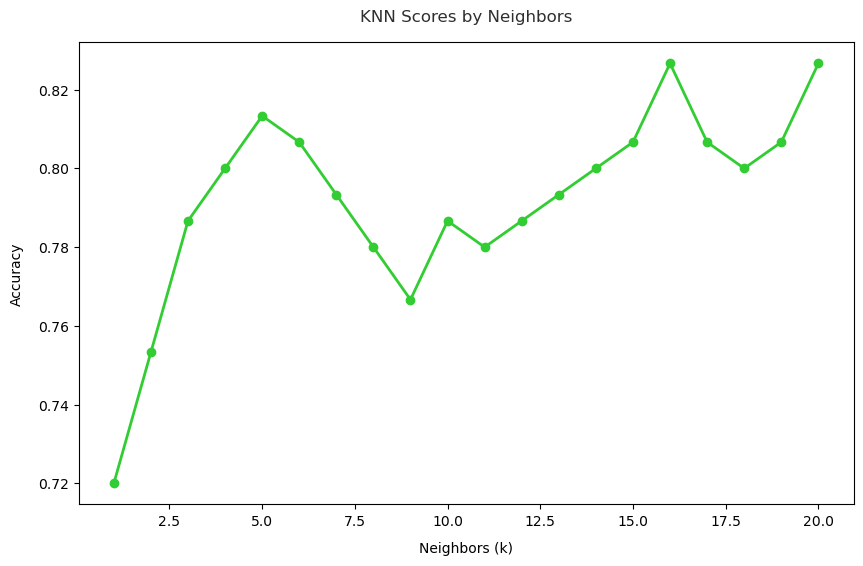

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(k_vals, acc_list, marker='o', color='#32CD32', linewidth=2)
plt.title('KNN Scores by Neighbors', color='#2F2F2F', pad=15)
plt.xlabel('Neighbors (k)', labelpad=10)
plt.ylabel('Accuracy', labelpad=10)
plt.show()

## 📈 Model Performance Comparison

| Model       | Setting     | Accuracy |
|

-|
| Decision Tree | max_depth = 5 | 80.00%   |

| KNN          | k = 16        | **82.67%** ✅ |

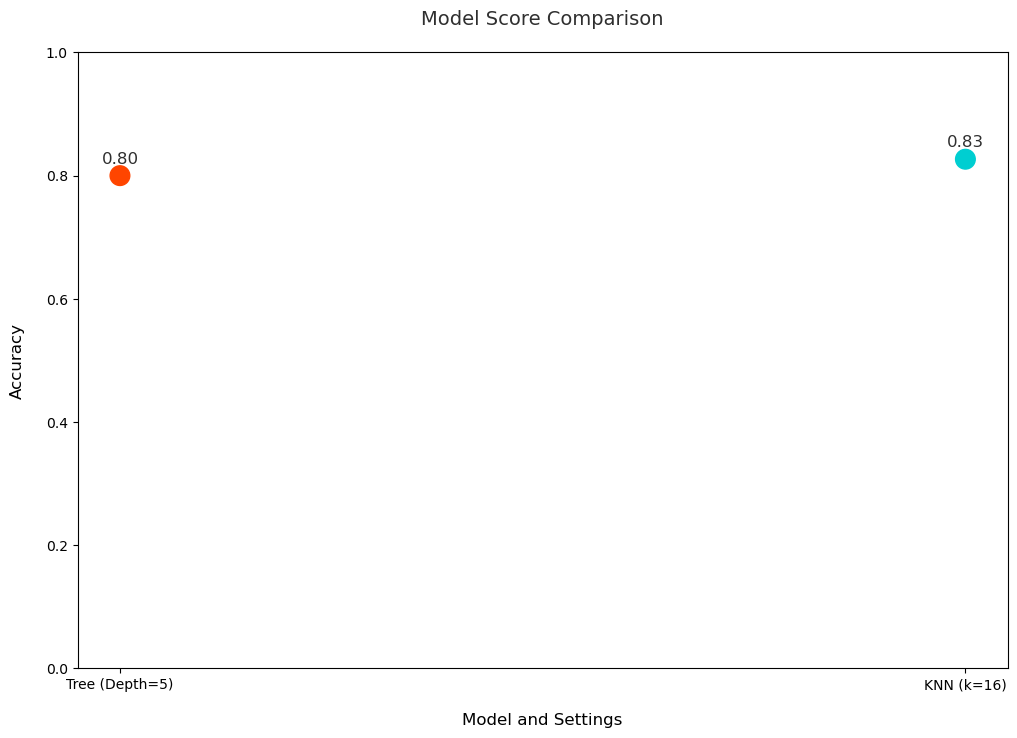

In [27]:
plt.figure(figsize=(12, 8))
plt.scatter(['Tree (Depth=5)', f'KNN (k={best_k})'], [tree_acc, knn_acc], color=['#FF4500', '#00CED1'], s=200)
plt.title('Model Score Comparison', color='#2F2F2F', pad=20, fontsize=14)
plt.xlabel('Model and Settings', labelpad=15, fontsize=12)
plt.ylabel('Accuracy', labelpad=15, fontsize=12)
plt.ylim(0, 1)
for i, v in enumerate([tree_acc, knn_acc]):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=12, color='#2F2F2F')
plt.show()

## 🏁 Conclusion ( Summarizes the best model )

> ✅ **The KNN model outperformed the Decision Tree** with an accuracy of **82.67%**, using **16 neighbors**.  
> This suggests that KNN captured passenger survival patterns more effectively in this case.

In [28]:
print("\nFinal thought: The {} model with {}={} got {}% accuracy,".format(
    'Tree' if tree_acc > knn_acc else 'KNN',
    'max_depth' if tree_acc > knn_acc else 'k',
    5 if tree_acc > knn_acc else best_k,
    round(max(tree_acc, knn_acc) * 100, 2)
))
print("better than the {} model with {}%, so it’s better at guessing survival.".format(
    'KNN' if tree_acc > knn_acc else 'Tree',
    round(min(tree_acc, knn_acc) * 100, 2)
))


Final thought: The KNN model with k=16 got 82.67% accuracy,
better than the Tree model with 80.0%, so it’s better at guessing survival.


## 📌 Key Insights from Titanic Data

- 🎟️ **Higher fare = higher chance of survival**
- 🧕 **Females and children** were prioritized in rescue
- 💼 **Solo travelers** often had better survival outcomes
- 👪 Family size has a **mixed effect** — small families fared better

## ✅ What’s Next?

You could extend this analysis by:
- 🔁 Trying more ML models like Logistic Regression, SVM, or Random Forest
- 📉 Performing cross-validation
- 🧪 Hyperparameter tuning
- 🧠 Deploying the model using Flask or Streamlit